In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define a method to draw the year data

In [63]:
def get_year_figure(city:str, sitename: str, start: str, end: str, pollutant: str):
    """Create a year-based line chart with the pollutant and save it

    Args:
        city (str): City or county name
        sitename (str): Area name
        start (str): start time, the format is yyyy-mm-dd
        end (str): end time, the format is yyyy-mm-dd
        pollutant (str): what pollutant you would like to know
    """
    
    path = f"../data/processed/{city}.csv"
    
    # Read the file and set date column to datetime type
    try:
        df = pd.read_csv(path)
        df = df.drop(columns="county")
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
    except FileNotFoundError:
        print("Can't find the file.")
    
    # drop the missing value in date if necessary
    df = df.dropna(subset="date")
    # if there is any missing value in date column, it will cause the data type to be float
    # so we create the day, month, and year column after drop the missing value
    df["day"] = df["date"].dt.date
    df["month"] = df["date"].dt.to_period("M").astype(str)
    df["year"] = df["date"].dt.year
    
    # find the match df according to the parameters
    df = df[(df["date"] > start) & (df["date"] < end) & (df["sitename"] == sitename)]
    df_year = df.groupby("year")[pollutant].agg(["max", "min", "mean"])
    
    # draw the figure
    plt.figure(figsize=(10, 8))
    
    plt.plot(df_year.index, df_year["max"], marker="x", label="Max", color="red")
    plt.plot(df_year.index, df_year["min"], marker="o", label="Min", color="green")
    plt.plot(df_year.index, df_year["mean"], marker="*", label="Mean", color="orange")
    
    # show the number
    for col, color in zip(["max", "min", "mean"], ["red", "green", "orange"]):
        for x, y in zip(df_year.index, df_year[col]):
            plt.text(x, y + (df_year[col].max() * 0.02), f"{y:.1f}", ha="center", va="bottom", fontsize=9, color=color)
    
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f"{pollutant} Concentration", fontsize=14)
    plt.title(f"{pollutant} Concentration in {sitename} between {start} to {end}", fontsize=18)
    plt.grid(linestyle="--", linewidth=1, alpha=0.3)
    plt.legend()
    
    # save figure
    # (YL) stands for year/line
    path = f"../figure/(YL){city}_{sitename}_{pollutant}_{start}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=600, bbox_inches="tight")
    print("Figure has been saved.")
    
    plt.show()

# Define a method to draw the month data

In [64]:
def get_month_figure(city:str, sitename: str, start: str, end: str, pollutant: str):
    """Create a month-based line chart with the pollutant and save it

    Args:
        city (str): City or county name
        sitename (str): Area name
        start (str): start time, the format is yyyy-mm-dd
        end (str): end time, the format is yyyy-mm-dd
        pollutant (str): what pollutant you would like to know
    """
    
    path = f"../data/processed/{city}.csv"
    
    # Read the file and set date column to datetime type
    try:
        df = pd.read_csv(path)
        df = df.drop(columns="county")
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
    except FileNotFoundError:
        print("Can't find the file.")
    
    # drop the missing value in date if necessary
    df = df.dropna(subset="date")
    # if there is any missing value in date column, it will cause the data type to be float
    # so we create the day, month, and year column after drop the missing value
    df["day"] = df["date"].dt.date
    df["month"] = df["date"].dt.to_period("M").astype(str)
    df["year"] = df["date"].dt.year
    
    # find the match df according to the parameters
    df = df[(df["date"] > start) & (df["date"] < end) & (df["sitename"] == sitename)]
    df_month = df.groupby("month")[pollutant].agg(["max", "min", "mean"])
    
    # draw the figure
    plt.figure(figsize=(10, 8))
    
    plt.plot(df_month.index, df_month["max"], marker="x", label="Max", color="red")
    plt.plot(df_month.index, df_month["min"], marker="o", label="Min", color="green")
    plt.plot(df_month.index, df_month["mean"], marker="*", label="Mean", color="orange")
    
    # show the number
    for col, color in zip(["max", "min", "mean"], ["red", "green", "orange"]):
        for x, y in zip(df_month.index, df_month[col]):
            plt.text(x, y + (df_month[col].max() * 0.02), f"{y:.1f}", ha="center", va="bottom", fontsize=9, color=color)
    
    plt.xlabel("Month", fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel(f"{pollutant} Concentration", fontsize=14)
    plt.title(f"{pollutant} Concentration in {sitename} between {start} to {end}", fontsize=18)
    plt.grid(linestyle="--", linewidth=1, alpha=0.3)
    plt.legend()
    
    # save figure
    # (ML) stands for month/line
    path = f"../figure/(ML){city}_{sitename}_{pollutant}_{start}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=600, bbox_inches="tight")
    print("Figure has been saved.")
    
    plt.show()

# Define a method to draw the day data

In [84]:
def get_day_figure(city:str, sitename: str, start: str, end: str, pollutant: str):
    """Create a month-based line chart with the pollutant and save it

    Args:
        city (str): City or county name
        sitename (str): Area name
        start (str): start time, the format is yyyy-mm-dd
        end (str): end time, the format is yyyy-mm-dd
        pollutant (str): what pollutant you would like to know
    """
    
    path = f"../data/processed/{city}.csv"
    
    # Read the file and set date column to datetime type
    try:
        df = pd.read_csv(path)
        df = df.drop(columns="county")
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
    except FileNotFoundError:
        print("Can't find the file.")
    
    # drop the missing value in date if necessary
    df = df.dropna(subset="date")
    # if there is any missing value in date column, it will cause the data type to be float
    # so we create the day, month, and year column after drop the missing value
    df["day"] = df["date"].dt.date
    df["month"] = df["date"].dt.to_period("M").astype(str)
    df["year"] = df["date"].dt.year
    
    # find the match df according to the parameters
    df = df[(df["date"] > start) & (df["date"] < end) & (df["sitename"] == sitename)]
    df_day = df.groupby("day")[pollutant].agg(["max", "min", "mean"])
    
    # draw the figure
    plt.figure(figsize=(16, 8))
    
    plt.plot(df_day.index, df_day["max"], marker="x", label="Max", color="red")
    plt.plot(df_day.index, df_day["min"], marker="o", label="Min", color="green")
    plt.plot(df_day.index, df_day["mean"], marker="*", label="Mean", color="orange")
    
    # show the number
    for col, color in zip(["max", "min", "mean"], ["red", "green", "orange"]):
        for x, y in zip(df_day.index, df_day[col]):
            plt.text(x, y + (df_day[col].max() * 0.02), f"{y:.1f}", ha="center", va="bottom", fontsize=9, color=color)
    
    plt.xlabel("Date", fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel(f"{pollutant} Concentration", fontsize=14)
    plt.title(f"{pollutant} Concentration in {sitename} between {start} to {end}", fontsize=18)
    plt.grid(linestyle="--", linewidth=1, alpha=0.3)
    plt.legend()
    
    # save figure
    # (ML) stands for day/line
    path = f"../figure/(DL){city}_{sitename}_{pollutant}_{start}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=600, bbox_inches="tight")
    print("Figure has been saved.")
    
    plt.show()

Figure has been saved.


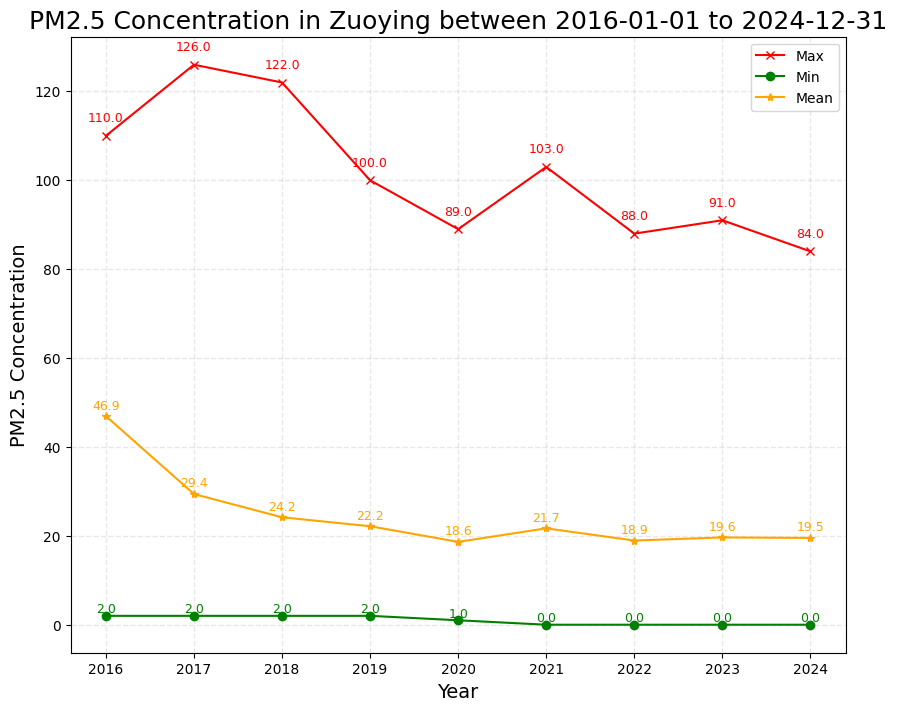

In [60]:
get_year_figure(
    city="Kaohsiung_City",
    sitename="Zuoying",
    start="2016-01-01",
    end="2024-12-31",
    pollutant="pm2.5"
    )

Figure has been saved.


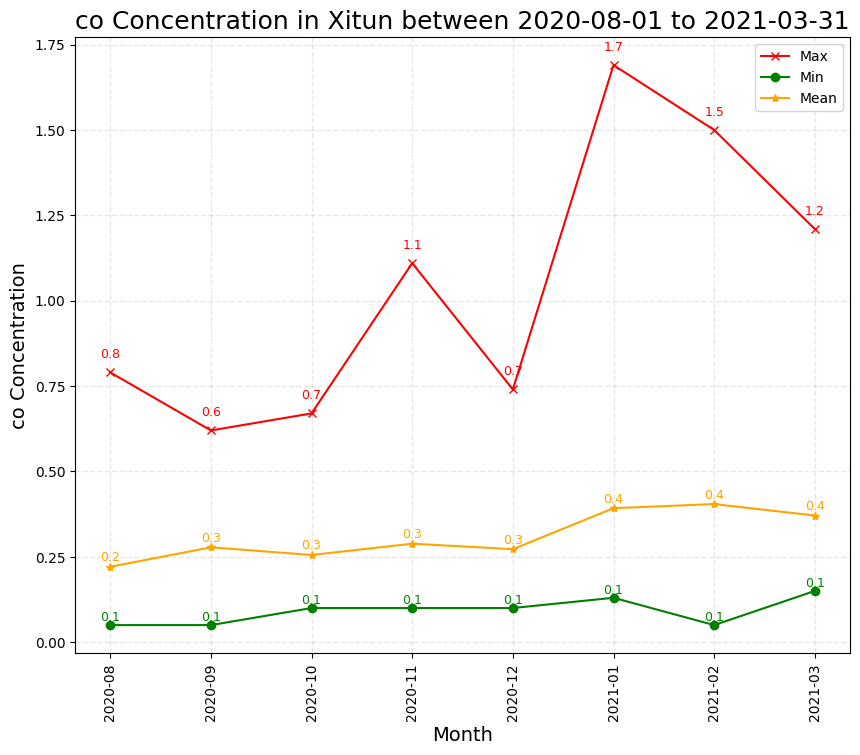

In [66]:
get_month_figure(
    city="Taichung_City",
    sitename="Xitun",
    start="2020-08-01",
    end="2021-03-31",
    pollutant="co"
    )

Figure has been saved.


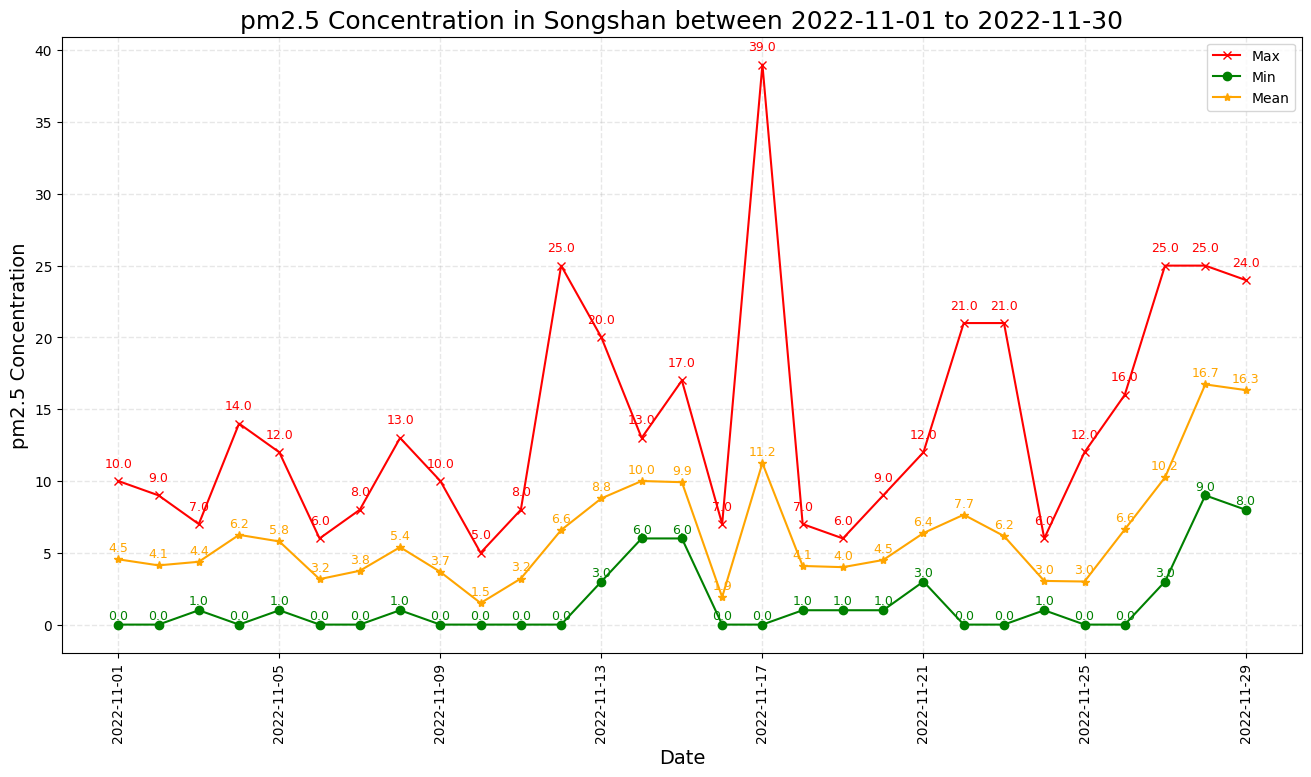

In [85]:
get_day_figure(
    city="Taipei_City",
    sitename="Songshan",
    start="2022-11-01",
    end="2022-11-30",
    pollutant="pm2.5"
)